In [111]:
from construct_eq_fpr_df import construct_df_for_eq_div_fpr
from construct_eq_fpr_df import get_fpr_eq_div
from get_data_fico import get_fpr_tpr_fico
from get_data_fico import get_base_rates
from get_data_fico import get_totals
import matplotlib.pylab as plt 
#from responsibly.dataset import build_FICO_dataset
from fairmlbook.code.creditscore_compas import criteria
from onehalfthreshold import get_optimal_fp_tp
from onehalfthreshold import get_optimal_fp_tp_hardtf
from onehalfthreshold import get_indices_for_a_opt
from onehalfthreshold import get_fpa_opt_tpa_opt_thres_a_opt
from matplotlib.font_manager import FontProperties
import pandas as pd 
import numpy as np 

In [112]:
%%markdown
# Data 

# Data 


In [113]:
list_attrs = ['Asian','Hispanic','Black','White']

fpr_df, tpr_df = get_fpr_tpr_fico()
data_fpr_Asian = fpr_df['Asian']
data_tpr_Asian = tpr_df['Asian']

data_fpr_Hispanic = fpr_df['Hispanic']
data_tpr_Hispanic = tpr_df['Hispanic']

data_fpr_Black = fpr_df['Black']
data_tpr_Black = tpr_df['Black']

data_fpr_White = fpr_df['White']
data_tpr_White = tpr_df['White']

#fraction of non-defaulters in each group 
fraction_non_defaulters = get_base_rates()

totals = get_totals()

In [114]:
eq_fpr_df = construct_df_for_eq_div_fpr(fpr_df,tpr_df,division=0.001)
print(eq_fpr_df)

Index(['Asian', 'Black', 'Hispanic', 'White'], dtype='object')
       Asian_tpr Asian_threshold  Black_tpr Black_threshold Hispanic_tpr  \
0.000          0             101          0             100            0   
0.001  0.0284424         97.8493  0.0569956         88.8561    0.0566159   
0.002    0.05543         96.0177  0.0962776         83.1231    0.0930819   
0.003  0.0808284         94.2304   0.137937         77.6382     0.121975   
0.004   0.105064         92.3585   0.169887         73.7316     0.147034   
...          ...             ...        ...             ...          ...   
0.995    0.99993        0.893144   0.999933        0.617852     0.999943   
0.996   0.999944        0.814515   0.999948        0.588004     0.999954   
0.997   0.999958        0.735886   0.999963        0.558156     0.999966   
0.998   0.999972        0.657258   0.999979        0.528308     0.999978   
0.999   0.999986        0.578629   0.999993        0.475461     0.999989   

      Hispanic_threshold

In [115]:
drop_thresholds_df = eq_fpr_df.drop(columns = ['Asian_threshold','Black_threshold', 'Hispanic_threshold','White_threshold'])
print(drop_thresholds_df)

       Asian_tpr  Black_tpr Hispanic_tpr  White_tpr
0.000          0          0            0          0
0.001  0.0284424  0.0569956    0.0566159  0.0317237
0.002    0.05543  0.0962776    0.0930819  0.0609469
0.003  0.0808284   0.137937     0.121975  0.0877923
0.004   0.105064   0.169887     0.147034   0.113204
...          ...        ...          ...        ...
0.995    0.99993   0.999933     0.999943   0.999968
0.996   0.999944   0.999948     0.999954   0.999974
0.997   0.999958   0.999963     0.999966   0.999981
0.998   0.999972   0.999979     0.999978   0.999987
0.999   0.999986   0.999993     0.999989   0.999994

[1000 rows x 4 columns]


In [116]:
%%markdown 
## Pointwise minimum curves 

## Pointwise minimum curves 


In [117]:
pointwise_min_df = drop_thresholds_df.min(axis=1)
print(pointwise_min_df)
eq_fpr = list(get_fpr_eq_div(division=0.001))
min_tpr = list(pointwise_min_df)

0.000    0.000000
0.001    0.028442
0.002    0.055430
0.003    0.080828
0.004    0.105064
           ...   
0.995    0.999930
0.996    0.999944
0.997    0.999958
0.998    0.999972
0.999    0.999986
Length: 1000, dtype: float64


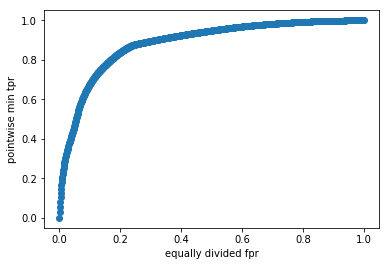

In [118]:
plt.plot(eq_fpr,min_tpr,'-o')
plt.xlabel('equally divided fpr')
plt.ylabel('pointwise min tpr')
plt.show()

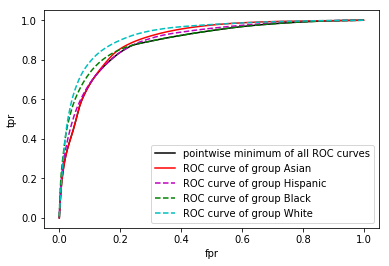

In [119]:
plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.plot(data_fpr_Asian, data_tpr_Asian,'-r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'--g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,'--c',label='ROC curve of group White')
plt.legend()

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [120]:
%%markdown
## Optimal false positive and true positive

## Optimal false positive and true positive


In [121]:
%%markdown 
## Optimal false positive and true positive rates output from semi-threshold classifier framework

## Optimal false positive and true positive rates output from semi-threshold classifier framework


In [122]:
target_rate = 5/6 #(this means loss from loaning to defaulter is 6 times as expensive as for profit from loaning to non-defaulter)
profit_semi, opt_fp_semi,opt_tp_semi = get_optimal_fp_tp_hardtf(totals, fraction_non_defaulters,target_rate,pointwise_min_df, eq_fpr) 
print('optimal fp from linear program assuming concave roc curves with target rate:' + str(target_rate) + '=', opt_fp_semi)
print('optimal tp from linear program assuming concave roc curves with target rate:' + str(target_rate) + '=', opt_tp_semi)
print('optimal profit from semi-threshold classifiers with target rate:' + str(target_rate) + '=', profit_semi)

optimal fp from linear program assuming concave roc curves with target rate:0.8333333333333334= 0.115
optimal tp from linear program assuming concave roc curves with target rate:0.8333333333333334= 0.7115204936866923
optimal profit from semi-threshold classifiers with target rate:0.8333333333333334= 9460.50624645945


In [123]:
%%markdown 
## Optimal false positive and true positive rates outfput from Hardt, Price and Sebro's framework


## Optimal false positive and true positive rates outfput from Hardt, Price and Sebro's framework


In [124]:
DATA_DIR='fairmlbook/code/creditscore_compas/data/'
def cleanup_frame(frame):
    """Rename and re-order columns"""
    frame = frame.rename(columns={'Non- Hispanic white': 'White'})
    frame = frame.reindex(['Asian', 'Black', 'Hispanic', 'White'], axis=1)
    return frame

def read_totals():
    """Read the total number of people of each race"""
    frame = cleanup_frame(pd.read_csv(DATA_DIR+files['overall'], index_col=0))
    return {r:frame[r]['SSA'] for r in frame.columns}

def parse_data(data_dir=DATA_DIR):
    """Parse sqf data set."""

    cdfs = cleanup_frame(pd.read_csv(data_dir+files['cdf_by_race'], index_col=0))
    performance = 100-cleanup_frame(pd.read_csv(data_dir+files['performance_by_race'], index_col=0))
    return (cdfs/100., performance/100.)

files = dict(cdf_by_race = 'transrisk_cdf_by_race_ssa.csv',
             performance_by_race = 'transrisk_performance_by_race_ssa.csv',
             overall = 'totals.csv')

cdfs = cleanup_frame(pd.read_csv(DATA_DIR+files['cdf_by_race'], index_col=0))
performance = 100-cleanup_frame(pd.read_csv(DATA_DIR+files['performance_by_race'], index_col=0))

data_pair = parse_data()
totals = read_totals()

In [125]:
data = criteria.CriteriaData(data_pair[0], data_pair[1], totals)
result = data.two_sided_optimum(target_rate) #same target rate we used for semi-threshold classifiers 
profit_hps, opt_fp_hps, opt_tp_hps = result[0],result[1][1],result[1][0]
print('optimal fp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=' , opt_fp_hps)
print('optimal tp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', opt_tp_hps)
print('optimal profit from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', profit_hps)

optimal fp from Hardt,Price and Sebro's framework with target rate:0.8333333333333334= 0.11393540338532593
optimal tp from Hardt,Price and Sebro's framework with target rate:0.8333333333333334= 0.709169501828308
optimal profit from Hardt,Price and Sebro's framework with target rate:0.8333333333333334= 9458.991724581278


In [126]:
%%markdown
## Plot data 

## Plot data 


In [127]:
%%markdown 
### Single target rate

### Single target rate


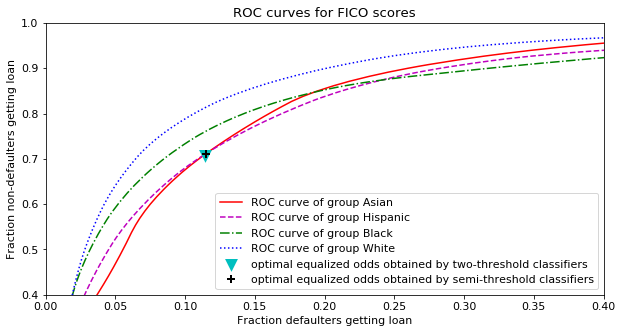

In [128]:
f = plt.figure(figsize=(10, 5))
#plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.rcParams.update({'font.size': 11})
plt.plot(data_fpr_Asian, data_tpr_Asian,'-r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'-.g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,':b',label='ROC curve of group White')
plt.plot(opt_fp_hps, opt_tp_hps,'vc',mew=3, ms=8,label = 'optimal equalized odds obtained by two-threshold classifiers')
plt.plot(opt_fp_semi,opt_tp_semi,'+k',mew=2, ms=8,label = 'optimal equalized odds obtained by semi-threshold classifiers')
plt.legend(loc=0)
plt.xlim([0.0,0.4])
plt.ylim([0.4,1])

plt.xlabel('Fraction defaulters getting loan')
plt.ylabel('Fraction non-defaulters getting loan')
plt.title('ROC curves for FICO scores')
plt.show()
#f.savefig('figures/zoomed_fico_tr_2_3.png')
#f.savefig('figures/fico_tr_2_3.png')

In [129]:
%%markdown
## Many target rates 

## Many target rates 


0.000& 0.999& 0.994&1.000& 1.000& -121908.566& -121899.429& 9.137 \\ \hline
0.020& 0.999& 0.994&1.000& 1.000& -118428.703& -118425.336& 3.367 \\ \hline
0.040& 0.982& 0.982&1.000& 1.000& -114954.585& -114954.726& -0.141 \\ \hline
0.060& 0.921& 0.921&0.998& 0.998& -111516.517& -111516.692& -0.175 \\ \hline
0.080& 0.904& 0.904&0.998& 0.998& -108130.859& -108131.032& -0.173 \\ \hline
0.100& 0.883& 0.883&0.997& 0.997& -104769.410& -104769.613& -0.203 \\ \hline
0.120& 0.862& 0.862&0.996& 0.996& -101435.123& -101435.183& -0.061 \\ \hline
0.140& 0.811& 0.811&0.993& 0.992& -98138.880& -98138.909& -0.029 \\ \hline
0.160& 0.785& 0.785&0.990& 0.990& -94882.028& -94882.067& -0.039 \\ \hline
0.180& 0.777& 0.777&0.990& 0.990& -91653.573& -91653.769& -0.196 \\ \hline
0.200& 0.710& 0.710&0.983& 0.983& -88467.744& -88467.767& -0.023 \\ \hline
0.220& 0.683& 0.683&0.980& 0.980& -85342.344& -85342.414& -0.070 \\ \hline
0.240& 0.665& 0.666&0.978& 0.978& -82256.282& -82256.308& -0.027 \\ \hline
0.260& 0.629&

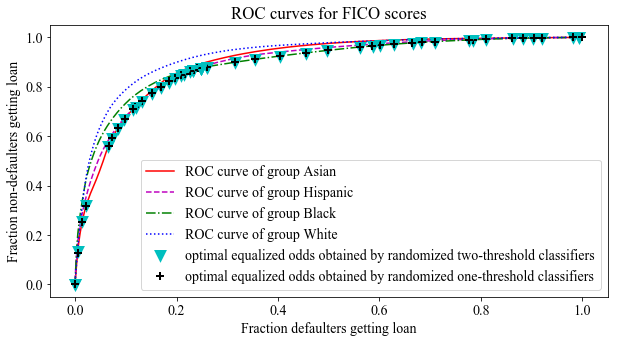

In [149]:
f = plt.figure(figsize=(10, 5))
#plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.plot(data_fpr_Asian, data_tpr_Asian,'-r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'-.g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,':b',label='ROC curve of group White')

for target_rate in np.arange(0,1.02,0.02):
    profit_semi, opt_fp_semi,opt_tp_semi = get_optimal_fp_tp_hardtf(totals, fraction_non_defaulters,target_rate,pointwise_min_df, eq_fpr) 
    result = data.two_sided_optimum(target_rate) #same target rate we used for semi-threshold classifiers 
    profit_hps, opt_fp_hps, opt_tp_hps = result[0],result[1][1],result[1][0]
    
    plt.plot(opt_fp_hps, opt_tp_hps,'vc',mew=3, ms=8)
    plt.plot(opt_fp_semi,opt_tp_semi,'+k',mew=2, ms=8)
    
    #print('optimal fp from linear program assuming concave roc curves with target rate:' + str(target_rate) + '=', opt_fp_semi)
    #print('optimal tp from linear program assuming concave roc curves with target rate:' + str(target_rate) + '=', opt_tp_semi)
    #print('optimal profit from semi-threshold classifiers with target rate:' + str(target_rate) + '=', profit_semi)
    
   # print('optimal fp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=' , opt_fp_hps)
   # print('optimal tp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', opt_tp_hps)
   # print('optimal profit from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', profit_hps)
    print("{:.3f}".format(target_rate) + '& ' + "{:.3f}".format(opt_fp_semi) + '& ' + "{:.3f}".format(opt_fp_hps) + '&' + 
          "{:.3f}".format(opt_tp_semi) + '& ' +  "{:.3f}".format(opt_tp_hps) + '& ' + "{:.3f}".format(-profit_semi) + '& ' + 
          "{:.3f}".format(-profit_hps) + '& ' + "{:.3f}".format(-(profit_hps - profit_semi)) + " \\\ \hline")
          
plt.plot(opt_fp_hps, opt_tp_hps,'vc',mew=3, ms=8,label = 'optimal equalized odds obtained by randomized two-threshold classifiers')
plt.plot(opt_fp_semi,opt_tp_semi,'+k',mew=2, ms=8,label = 'optimal equalized odds obtained by randomized one-threshold classifiers')

plt.legend(loc=0)

plt.xlabel('Fraction defaulters getting loan')
plt.ylabel('Fraction non-defaulters getting loan')
plt.title('ROC curves for FICO scores')
plt.show()
#f.savefig('figures/diff_cost_ratios_FICO',dpi=300)

In [131]:
%%markdown 
## Find threshold and probability of semi-threshold classifier for each attribute (at diff target rates)

## Find threshold and probability of semi-threshold classifier for each attribute (at diff target rates)


In [157]:
#Opt values for different loss function ratios! 
target_rate_list = np.arange(0.04,1,0.02)
opt_fp_list = []
opt_tp_list = []

for i in range(0, len(target_rate_list)):
    profit,opt_semi_fp, opt_semi_tp = get_optimal_fp_tp_hardtf(totals, fraction_non_defaulters,target_rate_list[i],pointwise_min_df, eq_fpr) 
    print('optimal fp:', opt_semi_fp)
    print('optimal tp:', opt_semi_tp)
    opt_fp_list.append(opt_semi_fp)
    opt_tp_list.append(opt_semi_tp)
    

optimal fp: 0.982
optimal tp: 0.999732174876328
optimal fp: 0.921
optimal tp: 0.9982716412728316
optimal fp: 0.904
optimal tp: 0.9977169379644982
optimal fp: 0.883
optimal tp: 0.9968450287677656
optimal fp: 0.862
optimal tp: 0.9957784434635968
optimal fp: 0.811
optimal tp: 0.9925188101742645
optimal fp: 0.785
optimal tp: 0.9904865000695423
optimal fp: 0.777
optimal tp: 0.9897865008569892
optimal fp: 0.71
optimal tp: 0.9830094537636259
optimal fp: 0.683
optimal tp: 0.9798758794801565
optimal fp: 0.665
optimal tp: 0.977609690070743
optimal fp: 0.629
optimal tp: 0.9726138416599581
optimal fp: 0.601
optimal tp: 0.9681855101169683
optimal fp: 0.586
optimal tp: 0.9655506558400779
optimal fp: 0.561
optimal tp: 0.9607585763789561
optimal fp: 0.498
optimal tp: 0.9473476314099983
optimal fp: 0.456
optimal tp: 0.937585368680248
optimal fp: 0.404
optimal tp: 0.9245491277679175
optimal fp: 0.355
optimal tp: 0.9111613679060495
optimal fp: 0.316
optimal tp: 0.8995116481108685
optimal fp: 0.261
optima

Opt ratio:  1.018057204558379
Opt false positive one threshold for group Asian: 0.9820069684456435
Opt true positive one threshold for group Asian: 0.99973926915262
Opt threshold one threshold for group Asian: 1.1590483861914391
Opt probablity p_a group Asian: 0.999992903873529
Opt false positive one threshold for group Hispanic: 0.9820268440279974
Opt true positive one threshold for group Hispanic: 0.9997595036324303
Opt threshold one threshold for group Hispanic: 1.091399861211185
Opt probablity p_a group Hispanic: 0.9999726646698502
Opt false positive one threshold for group Black: 0.982
Opt true positive one threshold for group Black: 0.999732174876328
Opt threshold one threshold for group Black: 1.0015969290911249
Opt probablity p_a group Black: 1.0
Opt false positive one threshold for group White: 0.9821328833640897
Opt true positive one threshold for group White: 0.9998674577425055
Opt threshold one threshold for group White: 1.1006867190152787
Opt probablity p_a group White: 0.

Opt ratio:  3.7128305058280713
Opt false positive one threshold for group Asian: 0.23890030276085228
Opt true positive one threshold for group Asian: 0.8869963319420545
Opt threshold one threshold for group Asian: 34.395512300004555
Opt probablity p_a group Asian: 0.9794880847607897
Opt false positive one threshold for group Hispanic: 0.234
Opt true positive one threshold for group Hispanic: 0.8688023383637687
Opt threshold one threshold for group Hispanic: 27.46633213770011
Opt probablity p_a group Hispanic: 1.0
Opt false positive one threshold for group Black: 0.23470842885011595
Opt true positive one threshold for group Black: 0.8714326146096879
Opt threshold one threshold for group Black: 21.441735751281115
Opt probablity p_a group Black: 0.996981664213822
Opt false positive one threshold for group White: 0.24988102453712893
Opt true positive one threshold for group White: 0.9277658907290252
Opt threshold one threshold for group White: 29.022296953322904
Opt probablity p_a group Wh

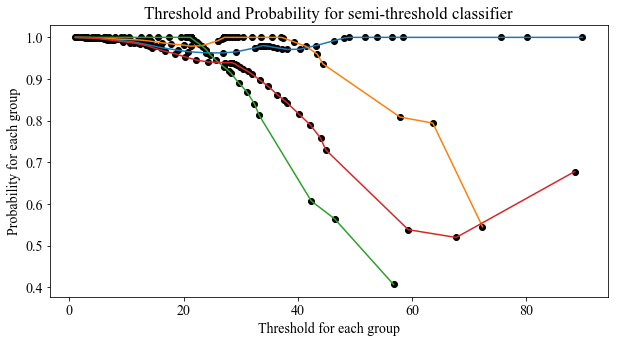

In [161]:
ta_pa_attr_dict = {'Asian': ([],[]), 'Hispanic': ([],[]), 'Black':([],[]), 'White': ([],[])}
f = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
for i in range(0,len(opt_fp_list)):
    opt_slope = opt_tp_list[i]/opt_fp_list[i]
    print('Opt ratio: ',opt_slope)
    same_opt_ratio_ta = []
    same_opt_ratio_pa = []
    for attr in list_attrs: 
        tp_attr_list = list(eq_fpr_df[attr+'_tpr'])
        found_index_1, found_index_2 = get_indices_for_a_opt(opt_slope,eq_fpr,tp_attr_list,0,len(eq_fpr) - 1)
        threshold_attr_list = list(eq_fpr_df[attr+'_threshold'])
        fpr_1 = eq_fpr[found_index_1]
        fpr_2 = eq_fpr[found_index_2]
        tpr_1 = tp_attr_list[found_index_1]
        tpr_2 = tp_attr_list[found_index_2]
        threshold_1 = threshold_attr_list[found_index_1]
        threshold_2 = threshold_attr_list[found_index_2]
        fpa_opt,tpa_opt,threshold_a_opt = get_fpa_opt_tpa_opt_thres_a_opt(fpr_1,fpr_2,tpr_1,tpr_2,threshold_1,threshold_2,opt_slope)
        p_a = opt_fp_list[i]/fpa_opt #=opt_tp/tpa_opt
        same_opt_ratio_ta.append(threshold_a_opt)
        same_opt_ratio_pa.append(p_a)
        ta_pa_attr_dict[attr][0].append(p_a)
        ta_pa_attr_dict[attr][1].append(threshold_a_opt)
        print('Opt false positive one threshold for group '+attr+':',fpa_opt)
        print('Opt true positive one threshold for group '+attr+':',tpa_opt)
        print('Opt threshold one threshold for group '+attr+':',threshold_a_opt)
        print('Opt probablity p_a group '+attr+':',p_a)
    
    plt.plot(same_opt_ratio_ta,same_opt_ratio_pa,'o',label='target_rate='+"{:.3f}".format(target_rate_list[i]))
    
for attr,val in ta_pa_attr_dict.items():
    plt.plot(ta_pa_attr_dict[attr][1],ta_pa_attr_dict[attr][0],'-',label='group = '+attr)

#plt.legend(loc=0)

plt.title('Threshold and Probability for randomized one-threshold classifier')
plt.xlabel('Threshold for each group')
plt.ylabel('Probability for each group')    
plt.show()

#f.savefig('figures/threshold_prob_fico_samecolloss',dpi=300)
    

In [162]:
%%markdown 
### Plot threshold vs loss ratio 

### Plot threshold vs loss ratio 


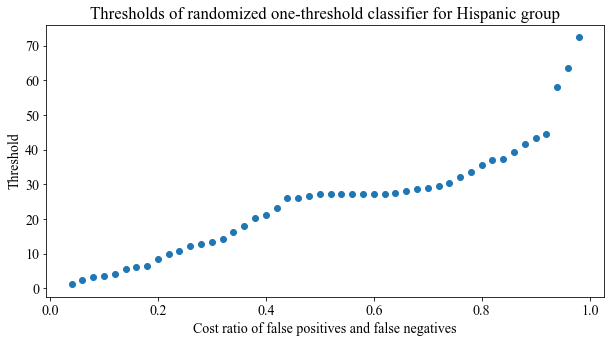

In [198]:
f = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.plot(target_rate_list,ta_pa_attr_dict['Hispanic'][1],'o')
plt.title('Thresholds of randomized one-threshold classifier for Hispanic group')
plt.ylabel('Threshold')
plt.xlabel('Cost ratio of false positives and false negatives')  
plt.show()  
f.savefig('figures/threshold_fico_loss_hispanic',dpi=300)

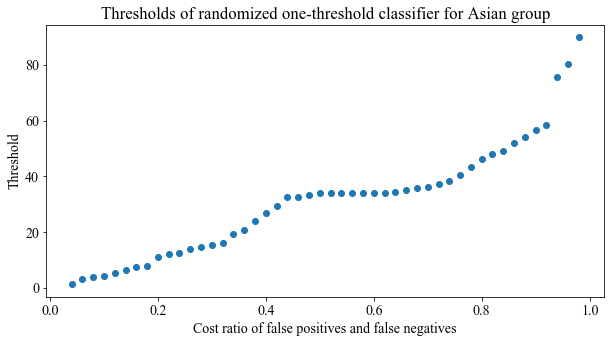

In [196]:
f = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.plot(target_rate_list,ta_pa_attr_dict['Asian'][1],'o')
plt.title('Thresholds of randomized one-threshold classifier for Asian group')
plt.ylabel('Threshold')
plt.xlabel('Cost ratio of false positives and false negatives')  
plt.show()
f.savefig('figures/threshold_fico_loss_Asian',dpi=300)

In [ ]:
### Plot probability vs loss ratio

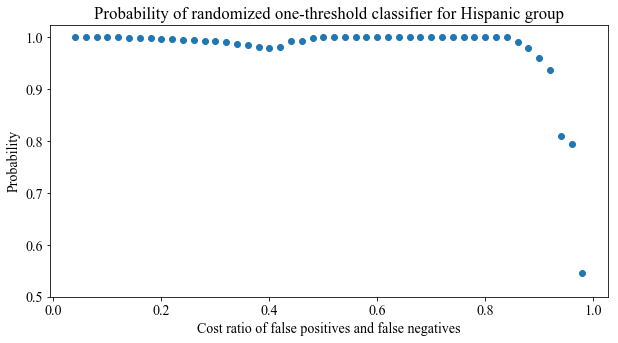

In [194]:
f = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.plot(target_rate_list,ta_pa_attr_dict['Hispanic'][0],'o')
plt.title('Probability of randomized one-threshold classifier for Hispanic group')
plt.ylabel('Probability')
plt.xlabel('Cost ratio of false positives and false negatives')  
plt.ylim(0.5)
plt.show()   
f.savefig('figures/probability_fico_loss_hispanic',dpi=300)

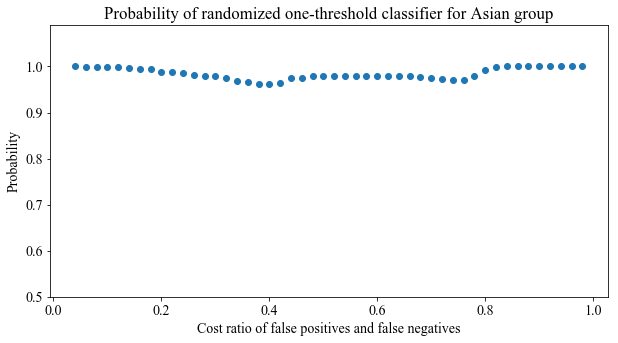

In [197]:
f = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.plot(target_rate_list,ta_pa_attr_dict['Asian'][0],'o')
plt.title('Probability of randomized one-threshold classifier for Asian group')
plt.ylabel('Probability')
plt.xlabel('Cost ratio of false positives and false negatives') 
plt.ylim(0.5,1.09)
plt.show()   
f.savefig('figures/probability_fico_loss_Asian',dpi=300)